In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L_aiw = np.loadtxt("./Results/Comparison_AIW_d2").reshape(1,7,20)
L_lew = np.loadtxt("./Results/Comparison_LEW_d2").reshape(1,7,20)
L_les = np.loadtxt("./Results/Comparison_LES_d2").reshape(1,7,20)

L_spdsw = np.zeros((1, 2, 7, 20))
for k, proj in enumerate([200]):
    L_spdsw[0, k] = np.loadtxt("./Results/Comparison_SWSPDp_projs_"+str(proj)+"_d2")

/home/clement/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/clement/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/clement/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


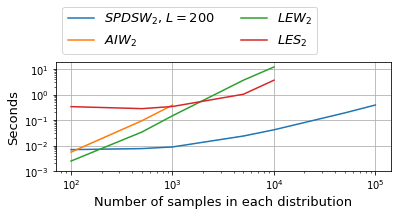

In [3]:
fig = plt.figure(figsize=(6,2))

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "cm"
# })

ds = [3]
# samples = [int(1e2),int(1e3),int(1e4),int(1e5/2),int(1e5)]
samples = [int(1e2),int(1e3/2),int(1e3),int(1e4/2),int(1e4),int(1e5/2),int(1e5)] #,int(1e6/2)]

for i, d in enumerate(ds):
    for l, n_projs in enumerate([200]):
        m = np.mean(L_spdsw[i, l], axis=-1)
        s = np.std(L_spdsw[i, l], axis=-1)
        
        plt.loglog(samples, m, label=r"$SPDSW_2$," + r" $L=$"+str(n_projs))
        plt.fill_between(samples, m-s, m+s,alpha=0.5)
        

    m_w = np.mean(L_aiw[i], axis=-1)
    s_w = np.std(L_aiw[i], axis=-1)

    plt.loglog(samples, m_w, label=r"$AIW_2$")
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)


    m_w = np.mean(L_lew[i], axis=-1)
    s_w = np.std(L_lew[i], axis=-1)

    plt.loglog(samples, m_w, label=r"$LEW_2$")
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    
    
    m_w = np.mean(L_les[i], axis=-1)
    s_w = np.std(L_les[i], axis=-1)

    plt.loglog(samples, m_w, label=r"$LES_2$")
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

plt.xlabel(r"Number of samples in each distribution", fontsize=13)
plt.ylabel(r"Seconds", fontsize=13)
#     plt.yscale("log")
    # plt.xscale("log")
    
# plt.legend(fontsize=13, bbox_to_anchor=(-0.05,1.02,1,0.2), loc="lower left", ncol=3)
plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
# plt.legend(fontsize=13, loc="upper right")
# plt.title("Computational Time", fontsize=13)
plt.grid(True)
plt.yticks([10,1,0.1,0.01,0.001])

plt.savefig("./Comparison_Time_SPDSW_d2.pdf", format="pdf", bbox_inches="tight")
plt.show()